In [ ]:
!kaggle datasets download adityakadiwal/water-potability

Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 28.9MB/s]


In [ ]:
!unzip /content/water-potability.zip

Archive:  /content/water-potability.zip
  inflating: water_potability.csv    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pc
import missingno as msno

In [ ]:
df = pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score,confusion_matrix
from sklearn import tree

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
new = pd.DataFrame(df['Potability'].value_counts())

In [ ]:
new

,count
Potability,
0,1998
1,1278


In [ ]:
fig = pc.pie(new, values='count', names=new.index, hole=0.4, opacity=0.8,
             labels={"label": "Potability", "Potability": "count of examples"})

fig.update_layout(title=dict(text="Drinkable rate")) # Correcting typo: 'upadte_layout' to 'update_layout'
fig.show()

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


[]

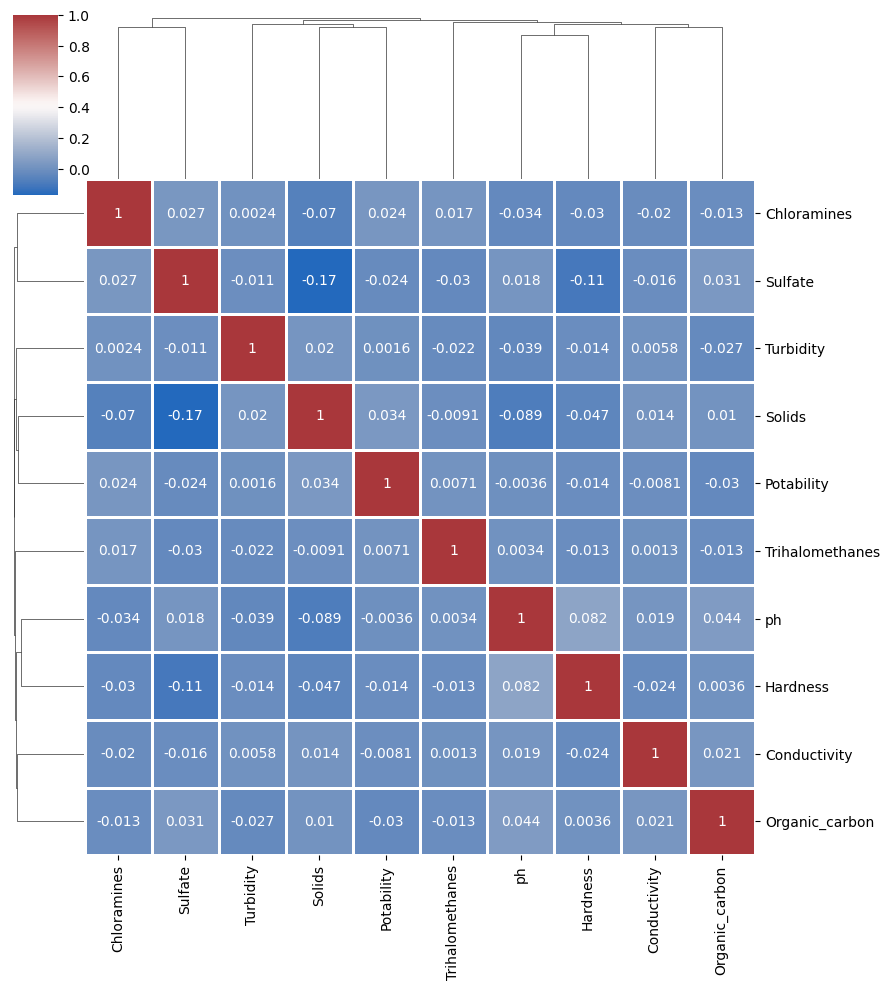

In [ ]:
sns.clustermap(df.corr(),cmap = "vlag",dendrogram_ratio=(0.1,0.2),annot = True,linewidths = .8,figsize=(9,10))
plt.plot()

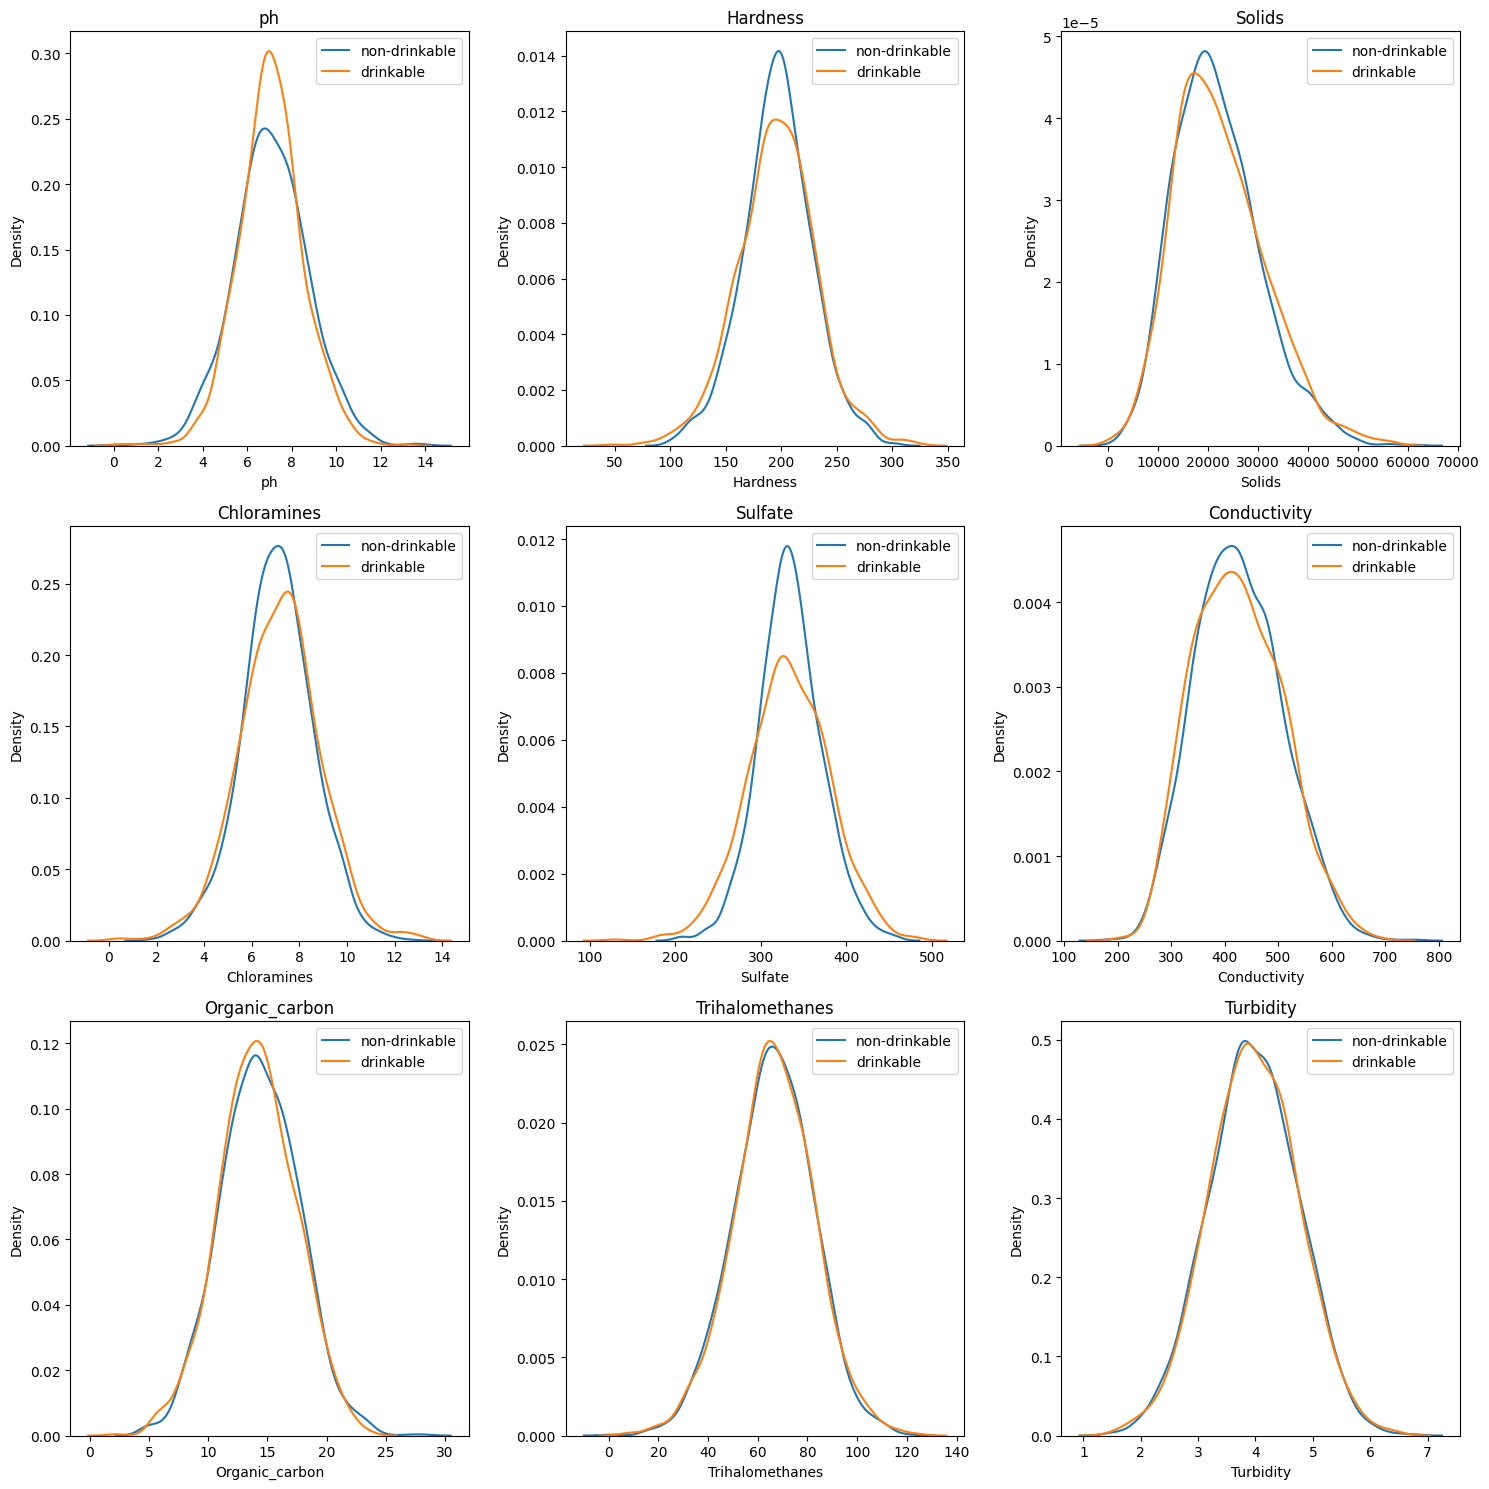

In [ ]:
non_potable = df.query("Potability==0")
potable = df.query("Potability==1")
plt.figure(figsize =(15,15))
for ax,col in enumerate(df.columns[:9]):
  plt.subplot(3,3,ax+1)
  plt.title(col)
  sns.kdeplot(x = non_potable[col],label = "non-drinkable")
  sns.kdeplot(x = potable[col],label = "drinkable")
  plt.legend()
plt.tight_layout()

<Axes: >

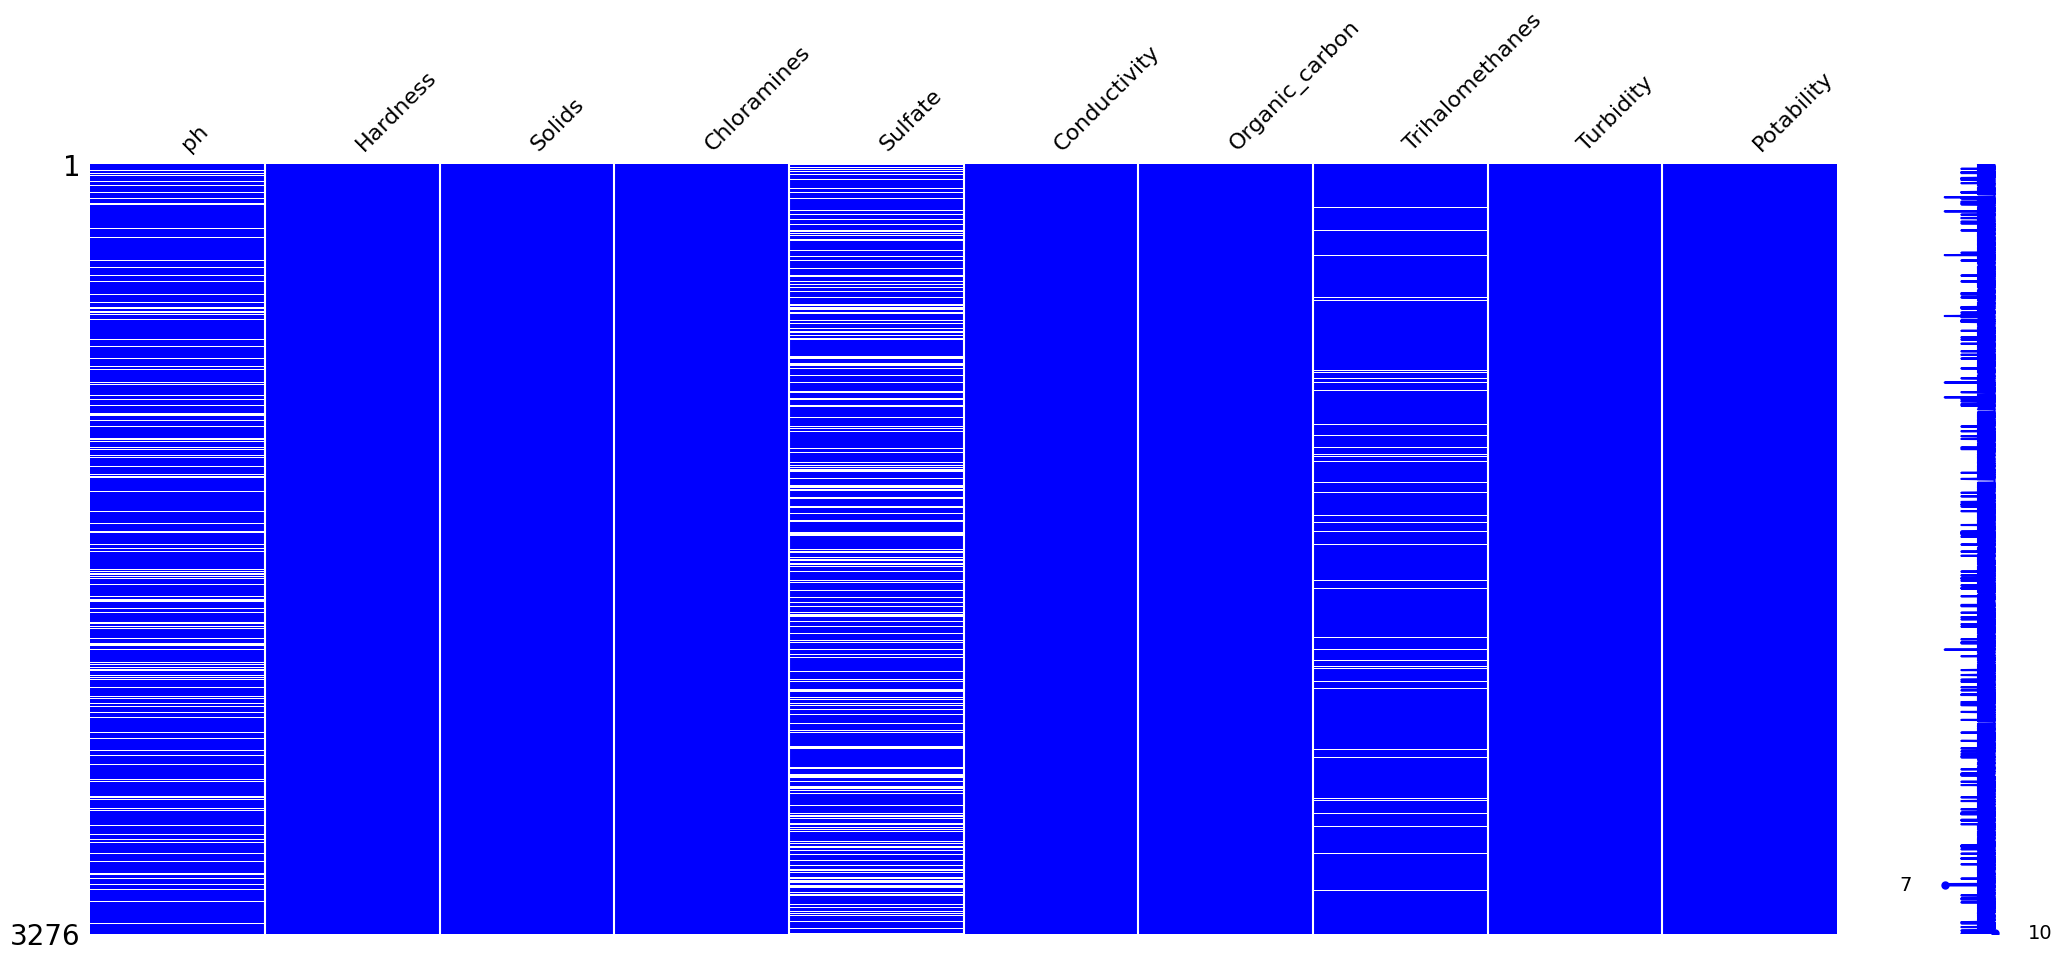

In [ ]:
msno.matrix(df,color = (0, 0, 1))

In [ ]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
for col in ["ph", "Sulfate", "Trihalomethanes"]:
        # Check the data type
        print(f"{col}: {df[col].dtype}")

        # Convert to numeric if necessary
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Fill NaN values with the mean
        df[col].fillna(value=df[col].mean(), inplace=True)

ph: object
Sulfate: object
Trihalomethanes: object


<ipython-input-28-d4e428d02636>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
X = df.drop("Potability",axis = 1)
y = df["Potability"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [ ]:
#normalizasiya edek
Xtrainmax = X_train.max()
Xtrainmin = X_train.min()
X_train = (X_train - Xtrainmin)/(Xtrainmax - Xtrainmin)
X_test = (X_test - Xtrainmin)/(Xtrainmax - Xtrainmin)

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,0.473115,0.518916,0.271719,0.445996,0.519064,0.400028,0.482387,0.490790,0.271206
831,0.477479,0.482105,0.552550,0.745564,0.612263,0.553599,0.185842,0.504933,0.483810
2658,0.488290,0.529482,0.290794,0.497914,0.479609,0.547339,0.394391,0.539942,0.659508
2495,0.505771,0.440635,0.197479,0.737832,0.542199,0.526286,0.373528,0.333933,0.333196
2603,0.457628,0.438217,0.283021,0.556615,0.578037,0.379982,0.540357,0.482580,0.587361
...,...,...,...,...,...,...,...,...,...
1095,0.299106,0.540324,0.348455,0.430067,0.563798,0.145183,0.286828,0.332459,0.590981
1130,0.556708,0.366407,0.409567,0.588339,0.651248,0.379423,0.456601,0.502662,0.519903
1294,0.473597,0.453744,0.499356,0.575458,0.581699,0.261240,0.394676,0.678419,0.380877
860,0.627369,0.579015,0.255458,0.550957,0.582489,0.362918,0.500776,0.336071,0.530215


In [ ]:
models = [("DTC",DecisionTreeClassifier(max_depth=3)),
          ("RF",RandomForestClassifier())]

In [ ]:
result = []
cmlist = []
for name,model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  score = precision_score(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred)
  result.append((name,score))
  cmlist.append((name,cm))
result

[('DTC', 0.5384615384615384), ('RF', 0.6062992125984252)]

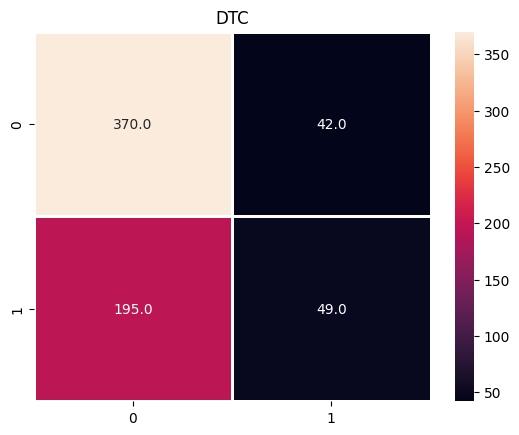

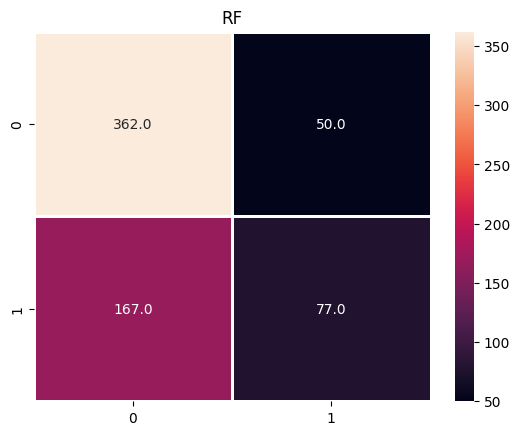

In [ ]:
for name,i in cmlist:
  plt.figure()
  sns.heatmap(i,annot = True,linewidths = 0.8,fmt = ".1f")
  plt.title(name)
  plt.show()

In [ ]:
new1 = models[0][1]
new1

DecisionTreeClassifier(max_depth=3)

In [ ]:
df.columns.tolist()[:-1]

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

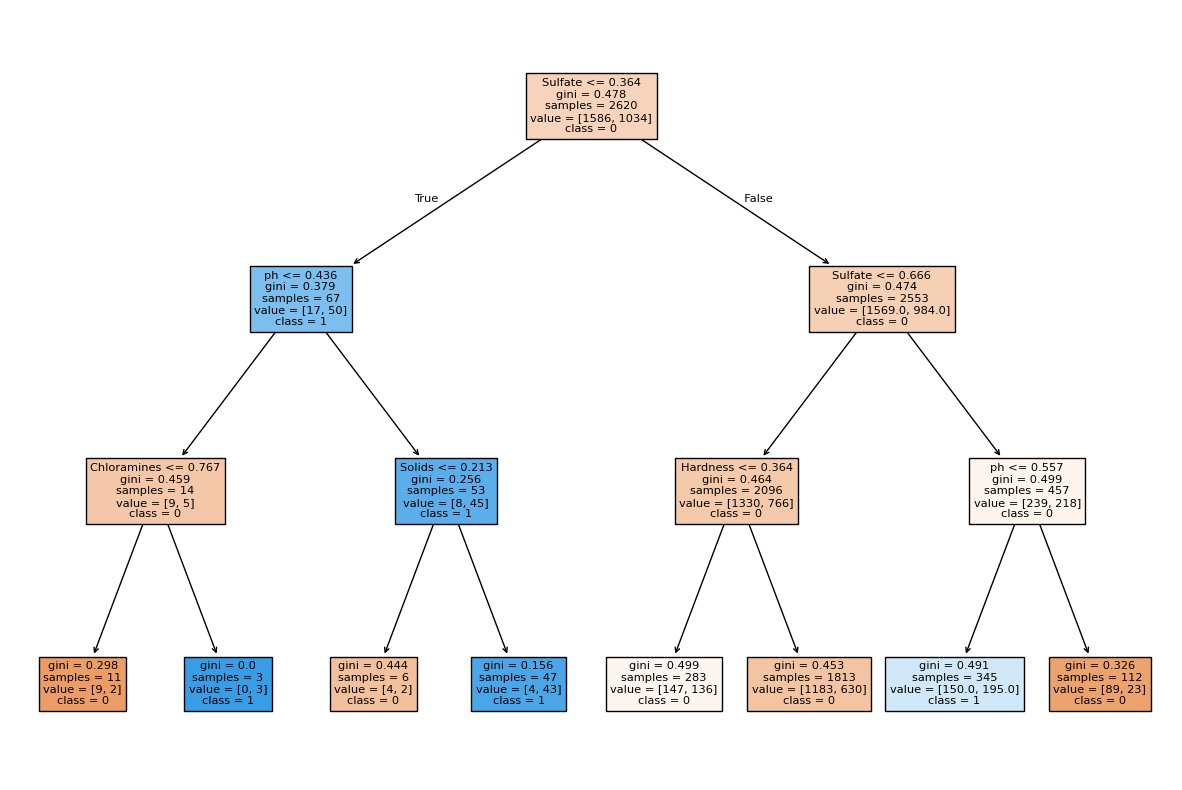

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(new1,feature_names = df.columns.tolist()[:-1],
               class_names = ["0","1"],filled = True)
plt.show()